In [32]:
from ydata_profiling import ProfileReport
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from helpers6 import PlotROCCurve, get_lstm_data_gen
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score,confusion_matrix, recall_score, f1_score, precision_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

- Importing the training and test datasets

In [2]:
output_path = '/Users/chenyiman/Documents/July23term/healthcareanalytics/Project/TASK3_DROP'
path = output_path
train = pd.read_csv((os.path.join(path, 'train_drop_v3.csv')))
test = pd.read_csv((os.path.join(path, 'test_drop_v3.csv')))

In [3]:
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 100) 
train.head()

,intime_ed,outtime_ed,gender,age,outcome_hospitalization,outcome_inhospital_mortality,ed_death,outcome_icu_transfer_12h,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,insurance_Medicaid,insurance_Medicare,insurance_Other,age_group_Young Adults,age_group_Middle-Aged Adults,age_group_Older Adults,age_group_Elderly,triage_MAP,score_CCI,score_CART,score_REMS,score_NEWS,score_NEWS2,score_MEWS
0,2179-09-07 12:19:00,2179-09-07 12:24:00,1,52.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.08,36.666667,78.0,18.0,99.0,123.0,87.0,6.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.777778,56.0,16.0,98.0,105.0,66.0,2.0,0.0,0.0,0,0,0,0,1,0,0,99.000000,1,0,2,0,0,1
1,2138-03-17 10:35:00,2138-03-17 10:41:00,0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.10,37.055556,65.0,18.0,100.0,149.0,60.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.722222,58.0,16.0,98.0,143.0,61.0,0.0,0.0,19.0,0,0,0,0,0,1,0,89.666667,8,4,7,0,0,1
2,2136-10-23 14:50:00,2136-10-23 14:59:00,1,30.0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0.15,37.000000,82.0,20.0,100.0,160.0,85.0,7.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36.888889,66.0,18.0,98.0,127.0,83.0,0.0,1.0,1.0,0,0,0,1,0,0,0,110.000000,1,0,2,0,0,1
3,2188-08-01 02:06:00,2188-08-01 09:57:00,1,39.0,1,0,0,0,0,0,0,3,1,0,0,1,0,0,0,7.85,36.111111,78.0,14.0,95.0,127.0,77.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,36.333333,76.0,18.0,98.0,107.0,54.0,0.0,1.0,2.0,0,0,1,0,1,0,0,93.666667,1,0,0,1,0,0
4,2143-11-12 10:30:00,2143-11-12 20:41:12,1,59.0,1,0,0,0,0,0,2,3,0,0,4,4,0,0,0,10.19,36.888889,63.0,18.0,99.0,230.0,87.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,36.833333,60.0,16.0,97.0,164.0,65.0,0.0,5.0,13.0,0,0,1,0,1,0,0,134.666667,6,4,8,3,3,3


In [4]:
len(train)

273032

In [70]:
train.groupby(by = ['outcome_icu_transfer_12h'])['outcome_ed_revisit_3d'].groups


{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, ...], 1: [14, 34, 107, 177, 190, 200, 228, 232, 254, 321, 324, 339, 353, 374, 468, 472, 481, 499, 524, 534, 550, 561, 607, 616, 630, 654, 683, 700, 731, 764, 790, 808, 813, 862, 882, 885, 893, 916, 922, 936, 947, 963, 967, 980, 981, 1002, 1006, 1028, 1043, 1053, 1079, 1119, 1174, 1176, 1217, 1266, 1268, 1270, 1282, 1309, 1336, 1398, 1438, 1479, 1493, 1570, 1605, 1621, 1622, 1687, 1728, 1758, 1760, 1771, 1775, 1827, 1874, 1899, 1945, 1973, 2004, 2028, 2044, 2099, 2106, 2110, 2153, 2162, 2295, 2353, 2382, 2390, 2392, 2429, 2450, 2479, 2501, 2515, 2522, 2549, ...]}

In [4]:
train = train[(train['outcome_inhospital_mortality'] == 0) & (train['ed_death'] == 0)]
test = test[(test['outcome_inhospital_mortality'] == 0) & (test['ed_death'] == 0)]


In [ ]:
# profile = ProfileReport(train,title = "HealthdataProfiling")
# profile.to_file("HealthdataProfiling")

- Dropping features of high correlation

In [5]:
variable = ["age", "gender", "intime_ed", "outtime_ed", 
            #"outcome_hospitalization", 
            "outcome_icu_transfer_12h", 
            #"outcome_critical",
            
            
            "n_ed_30d", 
            #"n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", 
            #"n_icu_90d", "n_icu_365d", 
            "ed_los_hours",
            "triage_temperature",
            #"triage_pain", 
            "triage_acuity", 
            #"triage_heartrate",
            "triage_resprate","triage_o2sat",
            #"triage_sbp",'triage_MAP',
            "triage_dbp",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
            "chiefcom_dizziness",
            
            "cci_MI", 
            #"cci_CHF", 
            "cci_PVD", 
            "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
            "cci_Rheumatic", "cci_PUD", "cci_Liver1", 
            #"cci_DM1", 
            "cci_DM2", 
            "cci_Paralysis",
            #"cci_Renal", "cci_Cancer1",  "cci_Cancer2", 
            "cci_HIV","cci_Liver2",
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN", 
            #"eci_HTN1", "eci_HTN2",  
            #"eci_CHF",
           #"eci_PVD", "eci_Pulmonary",
            #"eci_Paralysis",
            #"eci_DM1",
            #"eci_DM2",
            #"eci_Renal",
            #"eci_Liver","eci_PUD",
            #"eci_HIV",
            #"eci_Tumor2",
            "eci_Tumor1",
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            #"eci_Rheumatic",
            "eci_Obesity", "eci_WeightLoss", 
            #"eci_FluidsLytes",
            "eci_BloodLoss", 
            "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
            
            "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
            "ed_o2sat_last", "ed_sbp_last", 
            #"ed_dbp_last", 
            "ed_pain_last","n_med"
            #"n_medrecon",
           
#           'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other',
#             #'score_CCI', 'score_CART', 'score_REMS', 
            #'score_NEWS','score_NEWS2', 'score_MEWS'
           ]

outcome = "outcome_ed_revisit_3d"



In [6]:
X_train = train[variable].copy()
y_train = train[outcome].copy()
X_test = test[variable].copy()
y_test = test[outcome].copy()

In [7]:
X_train.dtypes.to_frame().T

,age,gender,intime_ed,outtime_ed,outcome_icu_transfer_12h,n_ed_30d,n_hosp_365d,n_icu_30d,ed_los_hours,triage_temperature,triage_acuity,triage_resprate,triage_o2sat,triage_dbp,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM2,cci_Paralysis,cci_HIV,cci_Liver2,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_Tumor1,eci_NeuroOther,eci_Hypothyroid,eci_Lymphoma,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_pain_last,n_med
0,float64,int64,object,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64


### General processing of dataset

- Recoding gender & Extracting hour from the timestamp

In [8]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

In [9]:
encoder = LabelEncoder()
X_train_1['gender'] = encoder.fit_transform(X_train_1['gender'])
X_test_1['gender'] = encoder.transform(X_test_1['gender'])

#Formatting the timestamp
X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed'], format='%Y-%m-%d %H:%M:%S')

X_train_1['intime_ed'] = pd.to_datetime(X_train_1['intime_ed']).dt.hour
X_test_1['intime_ed'] = pd.to_datetime(X_test_1['intime_ed']).dt.hour

X_train_1['outtime_ed'] = pd.to_datetime(X_train_1['outtime_ed']).dt.hour
X_test_1['outtime_ed'] = pd.to_datetime(X_test_1['outtime_ed']).dt.hour


In [10]:
X_train_3 = X_train_1.copy()
X_test_3 = X_test_1.copy()

### 4. Feature Scaling of Numerical Variables

In [ ]:
# X_train_3 is only scaled

In [11]:
# List the numerical variables which require scaling
num_features = ['n_ed_30d', 
       'n_hosp_365d', 'n_icu_30d','ed_los_hours',
       'triage_temperature', 'triage_resprate',
       'triage_o2sat', 'triage_dbp','triage_acuity',
        'ed_temperature_last','ed_heartrate_last', 'ed_resprate_last', 'ed_o2sat_last', 'ed_sbp_last',
       'ed_pain_last', 'n_med']

# instantiate MinMaxScaler to normalise the numeric fields
minmax = MinMaxScaler()
minmax.fit(X_train_3[num_features])

# Feature scaling for train set
feature_scaling_train = pd.DataFrame(minmax.transform(X_train_3[num_features]))
feature_scaling_train.columns = num_features
X_train_3 = X_train_3.drop(columns = num_features) # drop original columns
X_train_3 = pd.concat([X_train_3.reset_index(drop=True), feature_scaling_train], axis='columns')



# Feature scaling for test set
feature_scaling_test = pd.DataFrame(minmax.transform(X_test_3[num_features]))
feature_scaling_test.columns = num_features
X_test_3 = X_test_3.drop(columns = num_features) # drop original columns
X_test_3 = pd.concat([X_test_3.reset_index(drop=True), feature_scaling_test], axis='columns')


(2) X_train_2 Using Decision Tree to obtain initial feature importance

In [79]:
# Create Decision Tree classifer object
clf_2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train_2,y_train)



NameError: name 'X_train_2' is not defined

In [80]:
FI_2 = clf_2.feature_importances_
df_2 = pd.DataFrame({'Feature':X_train_2.columns,'Importances':FI_2}).sort_values(by = "Importances",ascending = False)

plt.bar(df_2['Feature'],df_2['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
important_feature_2 = df_2.loc[df_2['Importances']>0.01]['Feature'].values

X_train_2 = X_train[important_feature_2]
X_test_2 = X_test[important_feature_2]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

(3) X_train_3 Using Decision Tree to acquire initial feature importance

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_3,y_train)



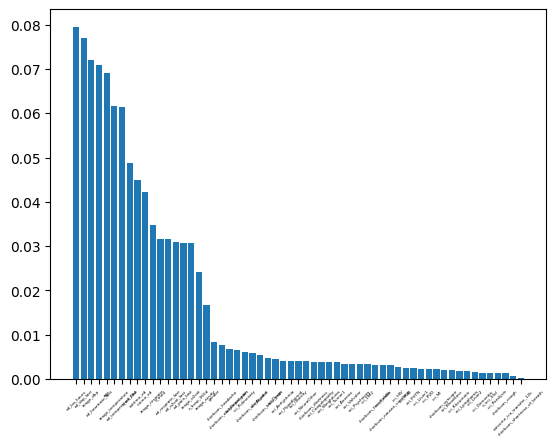

In [13]:
FI_3 = clf.feature_importances_
df_3 = pd.DataFrame({'Feature':X_train_3.columns,'Importances':FI_3}).sort_values(by = "Importances",ascending = False)

plt.bar(df_3['Feature'],df_3['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [14]:
important_feature_3 = df_3.loc[df_3['Importances']>0.01]['Feature'].values

X_train_3 = X_train_3[important_feature_3]
X_test_3 = X_test_3[important_feature_3]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03185140529299084 : 1


In [15]:
X_train_3.head()

,ed_los_hours,ed_sbp_last,triage_dbp,ed_heartrate_last,age,triage_temperature,ed_temperature_last,n_ed_30d,outtime_ed,intime_ed,triage_resprate,n_med,ed_resprate_last,ed_o2sat_last,ed_pain_last,triage_o2sat,n_hosp_365d,triage_acuity
0,0.000415,0.384906,0.232000,0.282828,52.0,0.611465,0.590923,0.0,12,12,0.081731,0.000000,0.088398,0.98,0.2,0.99,0.000000,0.75
1,0.000519,0.528302,0.160000,0.292929,69.0,0.633758,0.587877,0.0,10,10,0.081731,0.000000,0.088398,0.98,0.0,1.00,0.000000,0.25
2,0.000779,0.467925,0.226667,0.333333,30.0,0.630573,0.597015,0.0,14,14,0.091346,0.029412,0.099448,0.98,0.0,1.00,0.028571,0.50
3,0.040764,0.392453,0.205333,0.383838,39.0,0.579618,0.566555,0.0,9,2,0.062500,0.029412,0.099448,0.98,0.0,0.95,0.014286,0.75
4,0.052916,0.607547,0.232000,0.303030,59.0,0.624204,0.593969,0.0,20,10,0.081731,0.147059,0.088398,0.97,0.0,0.99,0.057143,0.25


(4) X_train_4 Using Decision Tree to acquire initial feature importance

In [85]:
# Create Decision Tree classifer object
clf_4 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_4 = clf_4.fit(X_train_4,y_train)

NameError: name 'X_train_4' is not defined

In [ ]:
FI_4 = clf_4.feature_importances_
df_4 = pd.DataFrame({'Feature':X_train_4.columns,'Importances':FI_4}).sort_values(by = "Importances",ascending = False)

plt.bar(df_4['Feature'],df_4['Importances'])
plt.xticks(rotation=45, fontsize = 3)
plt.show()

In [ ]:
important_feature_4 = df_4.loc[df_4['Importances']>0.01]['Feature'].values

X_train_4 = X_train_4[important_feature_4]
X_test_4 = X_test_4[important_feature_4]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

In [16]:
# Containers for all results
result_list_1 = []
result_list_2 = []
result_list_3 = []
result_list_4 = []
result_list = []

In [17]:
import time
confidence_interval = 95
random_seed = 0

(1) LR for X_train_1

(2) LR for X_train_2

(3) LR for X_train_3

Logistic Regression:


/opt/homebrew/Caskroom/miniforge/base/envs/env_chenyimane/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 1.5745248794555664 seconds
AUC: 0.6690845570712861
AUPRC: 0.12119797829873755
Sensitivity: 0.6190255220417633
Specificity: 0.6099703173757516
Score thresold: 0.02923785787039776
2.5 97.5


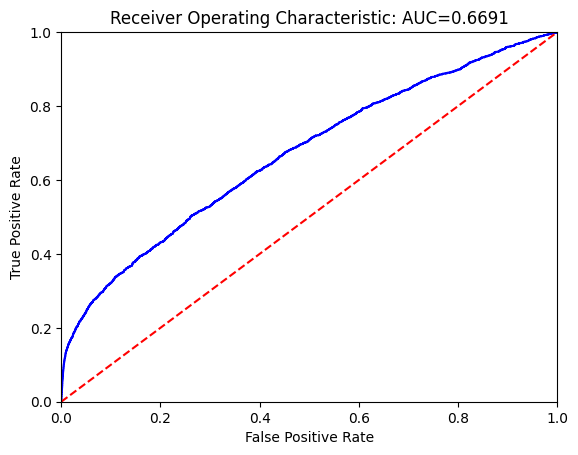

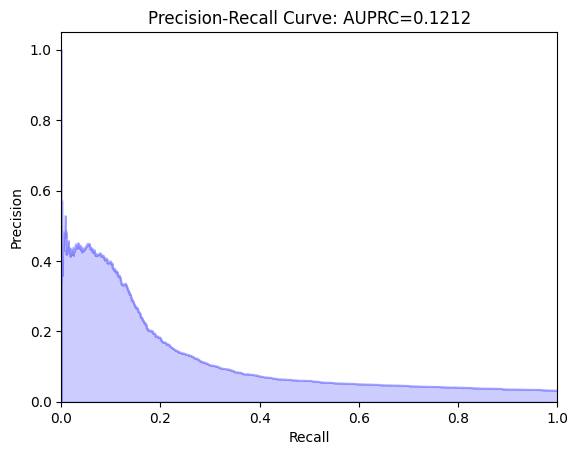

In [88]:
# (3) LR for X_train_3

print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train_3,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list_3.append(results)


# fpr, tpr, _ = metrics.roc_curve(y_test, probs[::,1])
# auc = metrics.roc_auc_score(y_test, probs[::,1])

#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()




(4) LR for X_train_4

- RF for X_train_1

- RF for scaled important features

In [ ]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train_2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test_2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list.append(results)



# fpr, tpr, _ = metrics.roc_curve(y_test, probs[::,1])
# auc = metrics.roc_auc_score(y_test, probs[::,1])
#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()




In [ ]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list.append(results)


- GB for X_train_1

- GB for X_train_2

- GB for X_train_3

GradientBoosting:
Training time: 38.59857201576233 seconds
AUC: 0.7401515758067101
AUPRC: 0.14413213224604057
Sensitivity: 0.6821345707656613
Specificity: 0.6551487936677068
Score thresold: 0.03013063885474255
2.5 97.5


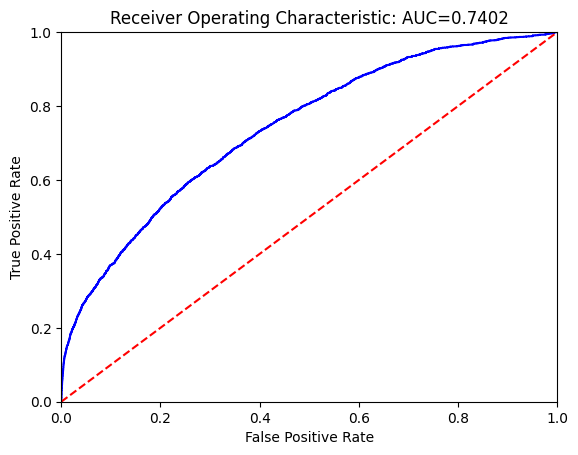

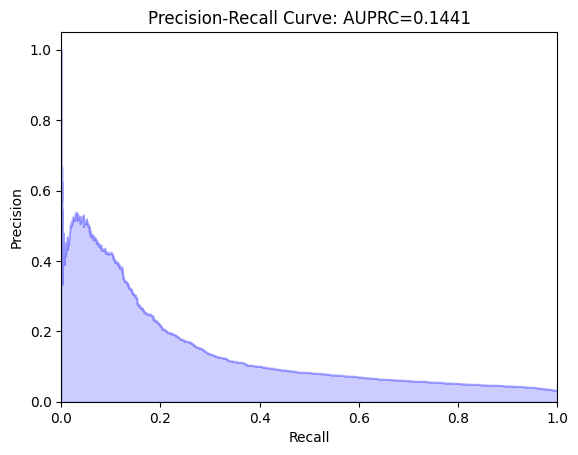

In [18]:
#- GB for X_train_3
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train_3, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list.append(results)


- GB for X_train_4 

In [42]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train_3.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

Epoch 1/20


2023-08-13 14:55:59.865676: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1358/1358 [==============================] - 1s 589us/step - loss: 0.1893 - accuracy: 0.9622 - auc: 0.6072 - true_positives: 50.0000 - true_negatives: 261108.0000 - precision: 0.0353 - recall: 0.0056
Epoch 2/20
1358/1358 [==============================] - 1s 616us/step - loss: 0.1355 - accuracy: 0.9674 - auc: 0.6738 - true_positives: 183.0000 - true_negatives: 262365.0000 - precision: 0.6246 - recall: 0.0205
Epoch 3/20
1358/1358 [==============================] - 1s 578us/step - loss: 0.1343 - accuracy: 0.9674 - auc: 0.6822 - true_positives: 307.0000 - true_negatives: 262261.0000 - precision: 0.5893 - recall: 0.0344
Epoch 4/20
1358/1358 [==============================] - 1s 596us/step - loss: 0.1336 - accuracy: 0.9674 - auc: 0.6876 - true_positives: 302.0000 - true_negatives: 262254.0000 - precision: 0.5774 - recall: 0.0338
Epoch 5/20
1358/1358 [==============================] - 1s 566us/step - loss: 0.1332 - accuracy: 0.9674 - auc: 0.6929 - true_positives: 319.0000 - true_negatives: 2

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp/assets


MLP:
2121/2121 [==============================] - 0s 201us/step
AUC: 0.728772470120922
AUPRC: 0.14179685491563015
Sensitivity: 0.6296983758700696
Specificity: 0.6937057614734758
Score thresold: 0.03905216
2.5 97.5


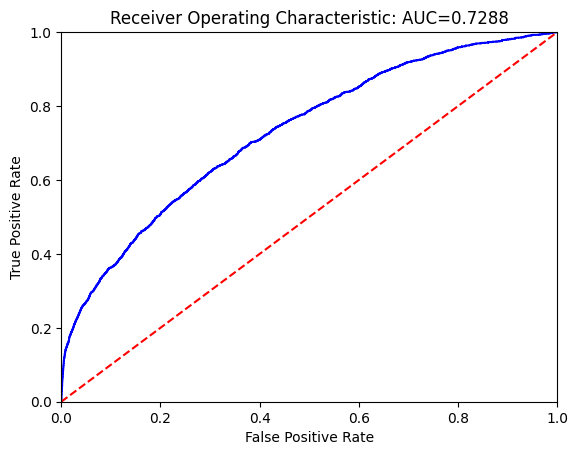

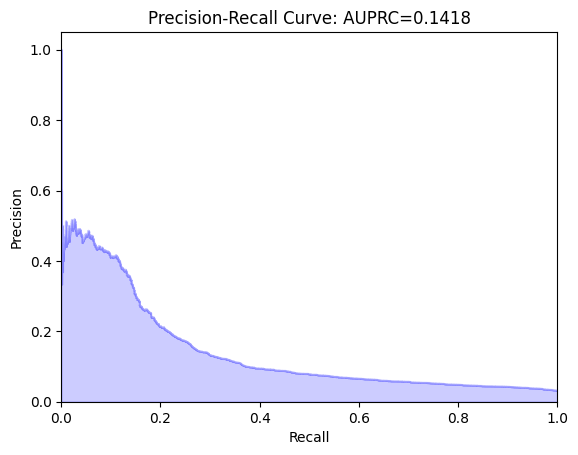

In [45]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test_3.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list.append(results)


XGBoosting:
Training time: 5.588696002960205 seconds
AUC: 0.7278032403487324
AUPRC: 0.13717410968216975
Sensitivity: 0.6501160092807424
Specificity: 0.6736737955704392
Score thresold: 0.029802654
2.5 97.5


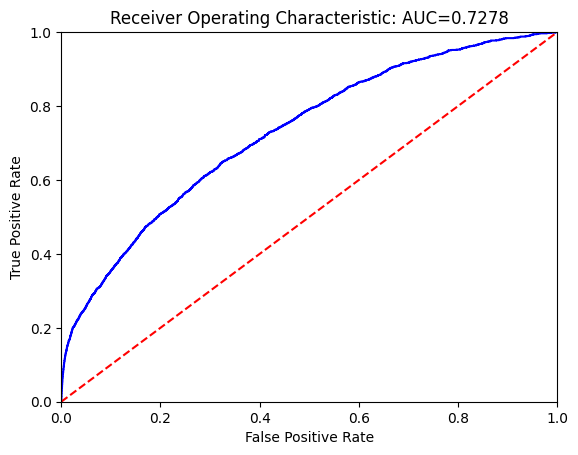

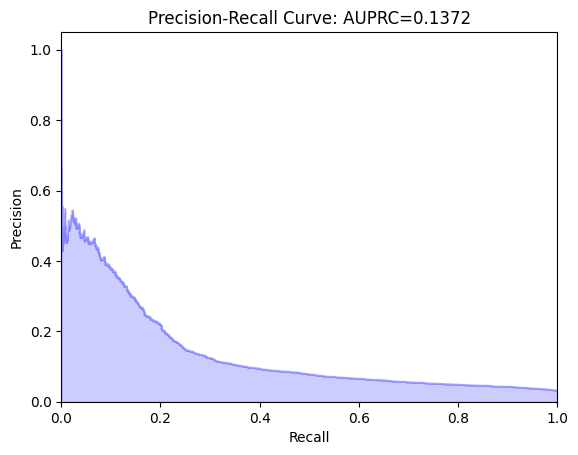

In [47]:
import xgboost as xgb
print("XGBoosting:")
xgb = xgb.XGBClassifier()
start = time.time()
xgb.fit(X_train_3, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test_3)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list.append(results)

### 4. Performance output

In [48]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,MLP,0.039,0.729 (0.723-0.738),0.142 (0.129-0.154),0.63 (0.626-0.69),0.694 (0.635-0.696),16.303
1,XGB,0.030,0.728 (0.722-0.737),0.137 (0.128-0.149),0.65 (0.639-0.67),0.674 (0.666-0.692),5.589


In [54]:
#importance_df = pd.DataFrame(zip(variable, importances), columns=['Variable','Importance'])
#importance_df.to_csv(os.path.join(path, 'importances_72h_ed_revisit_disposition.csv'))
#importance_df.sort_values(by='Importance', axis=0,ascending=False)

NameError: name 'importances' is not defined

### Hyperparameter tuning

Hyper-parameters to tune:

- learning_rate: [1, 0.5, 0.25, 0.1, 0.05, 0.01]
- n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
- max_depth: np.linspace(1, 10, 10, endpoint=True)
- min_samples_split: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
- min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
- max_features = [5,10,15,20,25,50,100,None]

<br>References: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

<br>Other References:
- https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
- https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

In [19]:
# Assign range of values for the hyperparameters

# learning rate shrinks the contribution of each tree by learning_rate. 
# There is a trade-off between learning_rate and n_estimators.
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. 
# However, adding a lot of trees can slow down the training process considerably
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

#max_depth indicates how deep the built tree can be. 
#The deeper the tree, the more splits it has and it captures more information about how the data.
max_depth = np.linspace(1, 10, 10, endpoint=True,dtype = int)


# min_samples_split represents the minimum number of samples required to split an internal node
# Here we will vary the parameter from 10% to 100% of the samples
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

#min_samples_leaf is The minimum number of samples required to be at a leaf node. 
#This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# max_features represents the number of features to consider when looking for the best split.
max_features = [5,10,15,20,25,50,100,None]

#### Tuning: learnig_rate and n_estimators

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators}

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(X_train_3,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_) 
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [20]:
# Replace tuned parameter(s) with best value
learning_rate = [] 
learning_rate.append(rand_search.best_params_['learning_rate'])

n_estimators = [] 
n_estimators.append(rand_search.best_params_['n_estimators'])

learning_rate, n_estimators

NameError: name 'rand_search' is not defined

In [21]:
learning_rate = [0.1]
n_estimators = [200]

#### Tuning: Max_Depth

In [ ]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid, 
                       scoring = 'f1', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(X_train_3,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_) 
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_f1"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_f1","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

In [113]:
# Replace tuned parameter(s) with best value
max_depth = [] 
max_depth.append(gb_grid.best_params_['max_depth'])

max_depth

[9]

In [22]:
max_depth = [9]

#### Tuning: min_samples_split and min_samples_leaf using Random Grid Search

In [23]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, scoring='roc_auc', n_iter=50, n_jobs=-1, refit=True,cv=5, verbose =3)

start = time.time()

# Fit the grid search model
rand_search.fit(X_train_3,y_train)

runtime = time.time()-start

print('Random Grid Search Tuning time:', runtime, 'seconds')

rand_search_results = pd.DataFrame(rand_search.cv_results_)

print('Best Score: ', rand_search.best_score_) 
print('Best Params: ', rand_search.best_params_)

# Rename mean_test_score to mean_roc_auc
rand_search_results["mean_roc_auc"] = rand_search_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
rand_search_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'learning_rate': [0.1], 'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], 'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END learning_rate=0.1, max_depth=9, min_samples_leaf=32, min_samples_split=64, n_estimators=200;, score=0.710 total time= 5.3min
[CV 4/5] END learning_rate=0.1, max_depth=9, min_samples_leaf=8, min_samples_split=128, n_estimators=200;, score=0.732 total time= 5.2min
[CV 4/5] END learning_rate=0.1, max_depth=9, min_samples_leaf=512, min_samples_split=2, n_estimators=200;, score=0.739 total time= 5.0min
[CV 2/5] END learning_rate=0.1, max_depth=9, min_samples_leaf=64, min_samples_split=4, n_estimators=200;, score=0.728 total time= 5.1min
[CV 4/5] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=512, n_estimators=200;, score=0.738 total time= 5.0min
[CV 2/5] END learning_rate=0.1, max_depth=9, min_sa

,param_learning_rate,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_roc_auc,rank_test_score
0,0.1,200,9,1024,8,0.738272,1
1,0.1,200,9,1024,2,0.738180,2
2,0.1,200,9,1024,4,0.738092,3
3,0.1,200,9,1024,16,0.737860,4
4,0.1,200,9,8,1024,0.735635,5
5,0.1,200,9,4,1024,0.735635,5
6,0.1,200,9,512,1024,0.735635,5
7,0.1,200,9,256,1024,0.735635,5
8,0.1,200,9,16,1024,0.735635,5
9,0.1,200,9,512,1,0.735275,10


In [24]:
# Replace tuned parameter(s) with best value
min_samples_split = [] 
min_samples_split.append(rand_search.best_params_['min_samples_split'])

min_samples_leaf = [] 
min_samples_leaf.append(rand_search.best_params_['min_samples_leaf'])

min_samples_split, min_samples_leaf

([1024], [8])

In [25]:
min_samples_split=[1024]
min_samples_leaf=[8]

#### Tuning: max_features

In [26]:
# Create the parameters for tuning
param_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features}

print(param_grid)

clf = GradientBoostingClassifier(random_state=1234)
# Instantiate the grid search model
gb_grid = GridSearchCV(estimator = clf, param_grid = param_grid, 
                       scoring = 'roc_auc', cv = 5, refit = True,
                       n_jobs = -1, verbose = 3)

start = time.time()

# Fit the grid search model
gb_grid.fit(X_train_3,y_train)

runtime = time.time()-start

print('Grid Search Tuning time:', runtime, 'seconds')

gb_grid_results = pd.DataFrame(gb_grid.cv_results_)

print('Best Score: ', gb_grid.best_score_) 
print('Best Params: ', gb_grid.best_params_)

# Rename mean_test_score to mean_roc_auc
gb_grid_results["mean_roc_auc"] = gb_grid_results['mean_test_score']

# For rearranging of columns
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_roc_auc","rank_test_score"]

#Output results from Grid Search
gb_grid_results[columns].sort_values(by="rank_test_score", ascending=True).reset_index(drop=True)

{'learning_rate': [0.1], 'n_estimators': [200], 'max_depth': [9], 'min_samples_split': [1024], 'min_samples_leaf': [8], 'max_features': [5, 10, 15, 20, 25, 50, 100, None]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Grid Search Tuning time: 1275.2109649181366 seconds
Best Score:  0.7382717734785311
Best Params:  {'learning_rate': 0.1, 'max_depth': 9, 'max_features': 20, 'min_samples_leaf': 8, 'min_samples_split': 1024, 'n_estimators': 200}


,param_learning_rate,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_roc_auc,rank_test_score
0,0.1,200,9,1024,8,20,0.738272,1
1,0.1,200,9,1024,8,25,0.738272,1
2,0.1,200,9,1024,8,50,0.738272,1
3,0.1,200,9,1024,8,100,0.738272,1
4,0.1,200,9,1024,8,None,0.738272,1
5,0.1,200,9,1024,8,5,0.738105,6
6,0.1,200,9,1024,8,15,0.737541,7
7,0.1,200,9,1024,8,10,0.737333,8


[CV 1/5] END learning_rate=0.1, max_depth=9, max_features=5, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.743 total time= 1.2min
[CV 5/5] END learning_rate=0.1, max_depth=9, max_features=10, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.732 total time= 2.3min
[CV 2/5] END learning_rate=0.1, max_depth=9, max_features=20, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.740 total time= 4.0min
[CV 5/5] END learning_rate=0.1, max_depth=9, max_features=25, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.734 total time= 4.4min
[CV 3/5] END learning_rate=0.1, max_depth=9, max_features=100, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.730 total time= 4.4min
[CV 2/5] END learning_rate=0.1, max_depth=9, max_features=5, min_samples_leaf=8, min_samples_split=1024, n_estimators=200;, score=0.740 total time= 1.2min
[CV 4/5] END learning_rate=0.1, max_depth=9, max_features=10, min

In [27]:
# Replace tuned parameter(s) with best value
max_features = [] 
max_features.append(gb_grid.best_params_['max_features'])

max_features

[20]

In [33]:
# Print hyperparameters used in the tuned model
print('Parameters currently in use:\n')
pprint(gb_grid.best_params_)

Parameters currently in use:

{'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 20,
 'min_samples_leaf': 8,
 'min_samples_split': 1024,
 'n_estimators': 200}


In [34]:
# assign the best estimator to to log_reg_tuned
gb_tuned = gb_grid.best_estimator_
gb_tuned

GradientBoostingClassifier(max_depth=9, max_features=20, min_samples_leaf=8,
                           min_samples_split=1024, n_estimators=200,
                           random_state=1234)

In [35]:
# Save the tuned model
pickle.dump(gb_tuned, open('gb_tuned.pkl','wb'))

In [ ]:
# load the tuned model
# gb_tuned = pickle.load(open('gb_tuned.pkl', 'rb'))

GradientBoosting:
Training time: 171.86291599273682 seconds
AUC: 0.7411059510226988
AUPRC: 0.14135018617643985
Sensitivity: 0.6612529002320185
Specificity: 0.6817870461983409
Score thresold: 0.03075364801776159
2.5 97.5


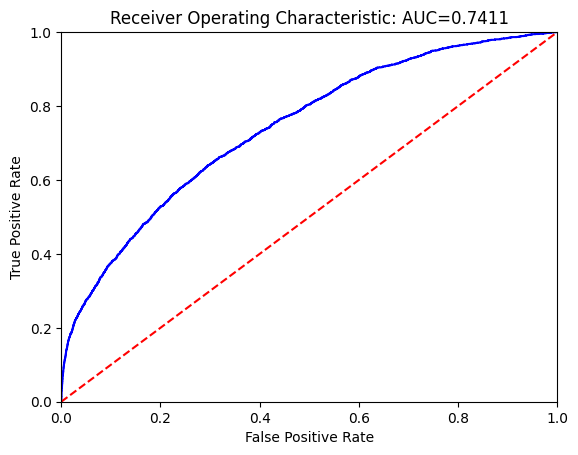

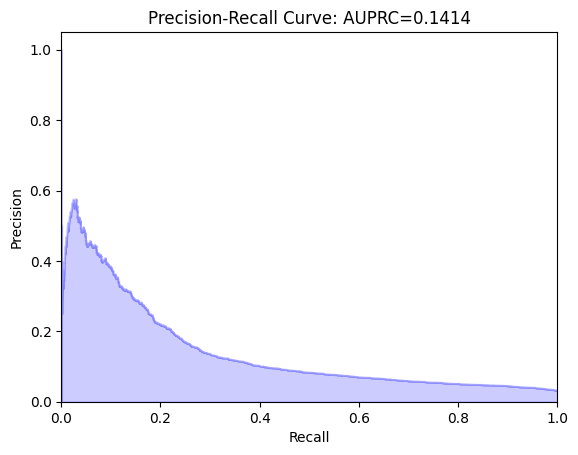

NameError: name 'result_list_gb' is not defined

In [37]:
# run the tuned GB model 
print("GradientBoosting:")

start = time.time()
gb_tuned.fit(X_train_3,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs_tuned = gb_tuned.predict_proba(X_test_3)
result = PlotROCCurve(probs_tuned[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB_tuned_with_MinMaxScaling"]
results.extend(result)
results.append(runtime)
result_list_gb.append(results)

In [39]:
# Feature importance for GB model
gb_feature_importance = pd.DataFrame(
        {
            'features': np.array(X_train_3.columns),    
            'importance' : gb_tuned.feature_importances_
            })

# Check top 20 features
gb_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20]

,features,importance
7,n_ed_30d,0.444017
16,n_hosp_365d,0.147753
0,ed_los_hours,0.106725
3,ed_heartrate_last,0.036743
11,n_med,0.031663
4,age,0.029394
1,ed_sbp_last,0.029047
6,ed_temperature_last,0.026831
2,triage_dbp,0.025935
8,outtime_ed,0.021134


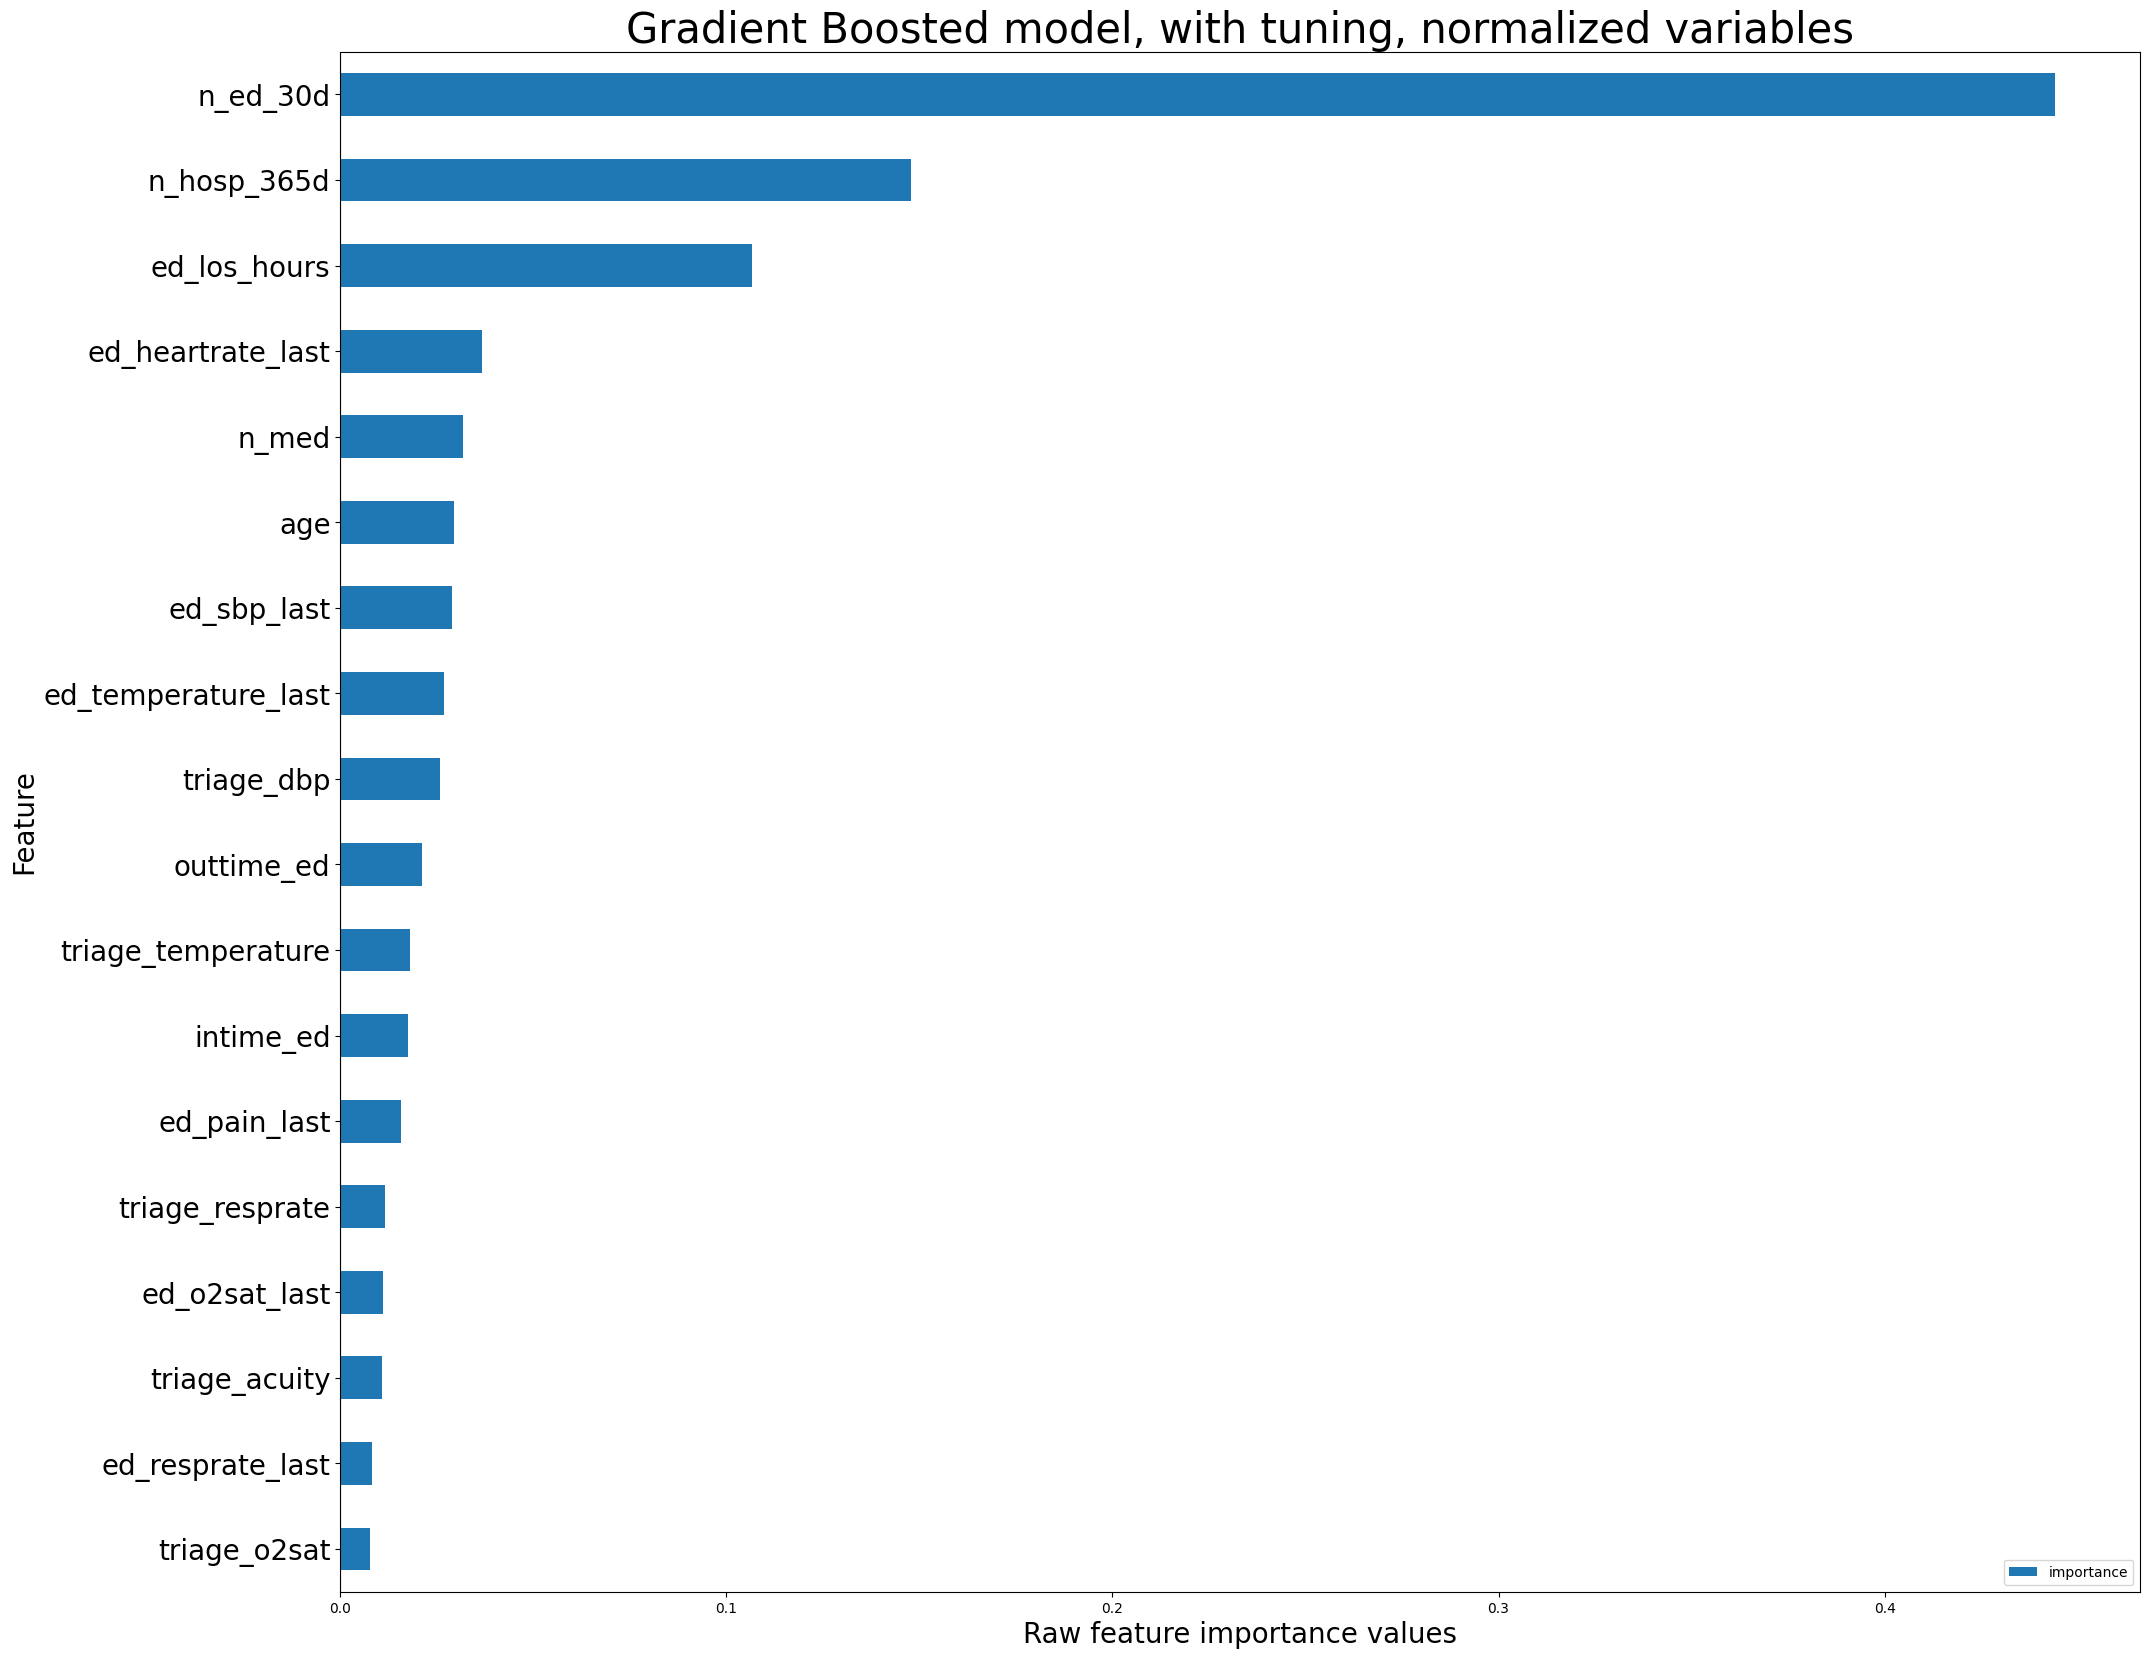

In [40]:
# Plot feature importance bar chart

sorted_feature_importance = gb_feature_importance.sort_values(by='importance',key=lambda x:abs(x),ascending=False)[:20].set_index('features')

sorted_feature_importance.sort_values(by='importance',key=lambda x:abs(x)).plot.barh(figsize=(30, 20))
plt.title("Gradient Boosted model, with tuning, normalized variables", fontsize=30)
plt.xlabel("Raw feature importance values", fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
